In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
# Read the CSV file into a DataFrame
df = pd.read_csv('IEA-EV-dataEV_salesCarsHistorical.csv')
# Extract rows 10 to 20 (inclusive)
selected_rows = df.iloc[0:23]

# Create a new DataFrame from the selected rows
separate_dataset = pd.DataFrame(selected_rows)

# Reset the index of the separate dataset
separate_dataset.reset_index(drop=True, inplace=True)

df_old= separate_dataset.drop(['region','category','parameter','mode','unit'],axis=1)

# Transform the data
df_old['log_value'] = df_old['value'].apply(lambda x: np.log(x))
df=df_old
print(df_old)

   powertrain  year  value  log_value
0         BEV  2011     49   3.891820
1         BEV  2012    170   5.135798
2        PHEV  2012     80   4.382027
3        PHEV  2013    100   4.605170
4         BEV  2013    190   5.247024
5         BEV  2014    370   5.913503
6        PHEV  2014    950   6.856462
7        PHEV  2015   1000   6.907755
8         BEV  2015    760   6.633318
9         BEV  2016    670   6.507278
10       PHEV  2016    700   6.551080
11       PHEV  2017   1100   7.003065
12        BEV  2017   1200   7.090077
13        BEV  2018   1800   7.495542
14       PHEV  2018   1800   7.495542
15       PHEV  2019   2900   7.972466
16        BEV  2019   6300   8.748305
17        BEV  2020   5200   8.556414
18       PHEV  2020   1700   7.438384
19       PHEV  2021   3400   8.131531
20        BEV  2021  17000   9.740969
21        BEV  2022  33000  10.404263
22       PHEV  2022   5900   8.682708


In [43]:
df.replace({'powertrain':{'PHEV':0,'BEV':1}},inplace=True)
x=df.drop(['log_value','value'],axis=1)
y=df[['log_value']]
print(df)
print(x)


    powertrain  year  value  log_value
0            1  2011     49   3.891820
1            1  2012    170   5.135798
2            0  2012     80   4.382027
3            0  2013    100   4.605170
4            1  2013    190   5.247024
5            1  2014    370   5.913503
6            0  2014    950   6.856462
7            0  2015   1000   6.907755
8            1  2015    760   6.633318
9            1  2016    670   6.507278
10           0  2016    700   6.551080
11           0  2017   1100   7.003065
12           1  2017   1200   7.090077
13           1  2018   1800   7.495542
14           0  2018   1800   7.495542
15           0  2019   2900   7.972466
16           1  2019   6300   8.748305
17           1  2020   5200   8.556414
18           0  2020   1700   7.438384
19           0  2021   3400   8.131531
20           1  2021  17000   9.740969
21           1  2022  33000  10.404263
22           0  2022   5900   8.682708
    powertrain  year
0            1  2011
1            1  2012
2

old_df = powertrain(string),year,value,log_value    
df = powertrain,year,value,log_value        
x = powertrain,year                            
y = log_value

fiting (x,y) to linearregression.

In [44]:
lin_model=LinearRegression()
lin_model.fit(x,y)

LinearRegression()

checking error of linear model with previous values

In [45]:
#checking error of linear model with previous values
from sklearn import metrics
#prdiction of training data
train_prediction=lin_model.predict(x)
# R squared Error
error_score = metrics.r2_score(y, train_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.895582392629686


Lasso Regression model

In [46]:
#make a lasso regrresion model
from sklearn.linear_model import Lasso
lasso_model=Lasso()
lasso_model.fit(x,y)

Lasso()

In [47]:
#error for Lasso Regression
from sklearn import metrics
#prdiction of training data
lasso_prediction=lasso_model.predict(x)
# R squared Error
error_score = metrics.r2_score(y, lasso_prediction)
print("R squared Error : ", error_score)

R squared Error :  0.8438092536765838


Lasso Regression gives lesser error compared to Linear Regression.


In [48]:
#data set for future years
future_PHEV = {'powertrain': ['PHEV', 'PHEV', 'PHEV', 'PHEV', 'PHEV' ],
          'year': [2023, 2024, 2025, 2026, 2027]}
future_df_PHEV = pd.DataFrame(future_PHEV)
future_BEV= {'powertrain': ['BEV', 'BEV', 'BEV', 'BEV', 'BEV' ],
          'year': [2023, 2024, 2025, 2026, 2027]}
future_df_BEV = pd.DataFrame(future_BEV)


seperating into PHEV and BEV for plotting

In [49]:
future_df_PHEV.replace({'PHEV':0,},inplace=True)
print(future_df_PHEV)
future_df_BEV.replace({'BEV':1,},inplace=True)
print(future_df_BEV)

   powertrain  year
0           0  2023
1           0  2024
2           0  2025
3           0  2026
4           0  2027
   powertrain  year
0           1  2023
1           1  2024
2           1  2025
3           1  2026
4           1  2027


In [50]:
#prediction using linear regression

lin_future_PHEV=lin_model.predict(future_df_PHEV)
lin_future_BEV=lin_model.predict(future_df_BEV)


In [51]:

# Create DataFrame of predicted values
future_predicted_value_PHEV= pd.DataFrame(lin_future_PHEV, columns=['log_values'])
future_predicted_value_BEV= pd.DataFrame(lin_future_BEV, columns=['log_values'])

print(future_predicted_value_PHEV)
print(future_predicted_value_BEV)

   log_values
0    9.691507
1   10.154846
2   10.618185
3   11.081524
4   11.544863
   log_values
0   10.125397
1   10.588736
2   11.052075
3   11.515414
4   11.978753


In [52]:
#converting back to usable values from log_values using exp
future_predicted_value_PHEV['value']=future_predicted_value_PHEV['log_values'].apply(lambda x: np.exp(x))
future_predicted_value_BEV['value']=future_predicted_value_BEV['log_values'].apply(lambda x:np.exp(x))
print(future_predicted_value_PHEV)
print(future_predicted_value_BEV)

   log_values          value
0    9.691507   16179.601184
1   10.154846   25715.409087
2   10.618185   40871.357520
3   11.081524   64959.801334
4   11.544863  103245.305403
   log_values          value
0   10.125397   24969.163869
1   10.588736   39685.296081
2   11.052075   63074.708201
3   11.515414  100249.190694
4   11.978753  159333.281461


predicting future years value using lasso regression

In [53]:
lasso_future_PHEV=lasso_model.predict(future_df_PHEV)
lasso_future_BEV=lasso_model.predict(future_df_BEV)
print(lasso_future_BEV)
print(lasso_future_PHEV)

[ 9.3212862   9.68933538 10.05738455 10.42543373 10.79348291]
[ 9.3212862   9.68933538 10.05738455 10.42543373 10.79348291]


In [54]:
#putting predictions in dataframe
future_predicted_value_PHEV_lasso= pd.DataFrame(lasso_future_PHEV, columns=['log_values'])
future_predicted_value_BEV_lasso= pd.DataFrame(lasso_future_BEV, columns=['log_values'])
print(future_predicted_value_PHEV_lasso)
print(future_predicted_value_BEV_lasso)

   log_values
0    9.321286
1    9.689335
2   10.057385
3   10.425434
4   10.793483
   log_values
0    9.321286
1    9.689335
2   10.057385
3   10.425434
4   10.793483


In [55]:
#converting to usable values from log_values
future_predicted_value_PHEV_lasso['values']=future_predicted_value_PHEV_lasso['log_values'].apply(lambda x: np.exp(x))
print(future_predicted_value_PHEV_lasso)
future_predicted_value_BEV_lasso['values']=future_predicted_value_BEV_lasso['log_values'].apply(lambda x: np.exp(x))
print(future_predicted_value_BEV_lasso)


   log_values        values
0    9.321286  11173.343728
1    9.689335  16144.510687
2   10.057385  23327.414932
3   10.425434  33706.087347
4   10.793483  48702.367047
   log_values        values
0    9.321286  11173.343728
1    9.689335  16144.510687
2   10.057385  23327.414932
3   10.425434  33706.087347
4   10.793483  48702.367047


In [56]:
# Filter the DataFrame by powertrain for finding value using model for each PHEV and BEV
df_x_PHEV = x[x['powertrain'] == 0]
df_x_BEV = x[x['powertrain'] == 1]


#calculating model values for known data 
df_x_PHEV['log_value']=lin_model.predict(df_x_PHEV)
df_x_PHEV['value']=df_x_PHEV['log_value'].apply(lambda x:np.exp(x))
df_x_PHEV
df_x_BEV['log_value']=lin_model.predict(df_x_BEV )
df_x_BEV['value']=df_x_BEV['log_value'].apply(lambda x:np.exp(x))
df_x_BEV

C:\Users\risha\AppData\Local\Temp\ipykernel_40996\3658990835.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x_PHEV['log_value']=lin_model.predict(df_x_PHEV)
C:\Users\risha\AppData\Local\Temp\ipykernel_40996\3658990835.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x_PHEV['value']=df_x_PHEV['log_value'].apply(lambda x:np.exp(x))
C:\Users\risha\AppData\Local\Temp\ipykernel_40996\3658990835.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,powertrain,year,log_value,value
0,1,2011,4.565327,96.094050
1,1,2012,5.028667,152.729216
4,1,2013,5.492006,242.743577
5,1,2014,5.955345,385.809904
8,1,2015,6.418684,613.195555
9,1,2016,6.882023,974.595996
12,1,2017,7.345362,1548.995829
13,1,2018,7.808701,2461.930980
16,1,2019,8.272040,3912.924774
17,1,2020,8.735380,6219.094040


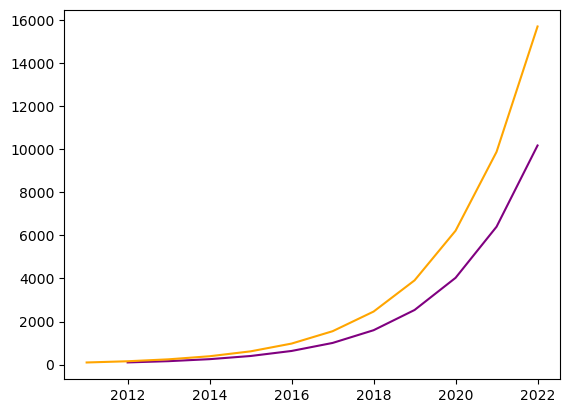

In [57]:
plt.plot(df_x_PHEV['year'], df_x_PHEV['value'], color='purple', label='New PHEV Data')
plt.plot(df_x_BEV['year'], df_x_BEV['value'], color='orange', label='New PHEV Data')

In [58]:
# Filter the DataFrame by powertrain
old_x_PHEV = df[df['powertrain'] == 0]
old_x_BEV = df[df['powertrain'] == 1]

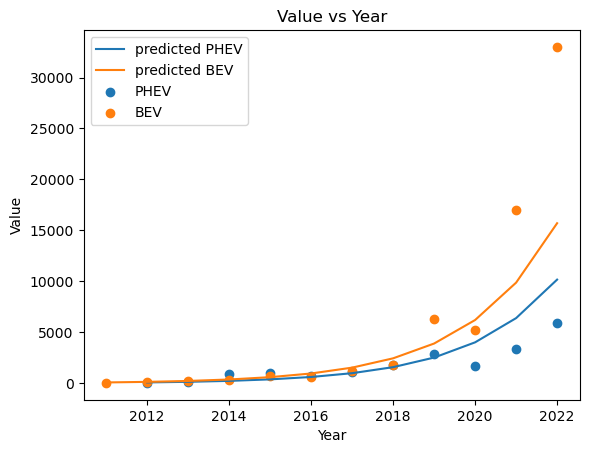

In [59]:


# Plotting new values for previous years
plt.plot(df_x_PHEV['year'], df_x_PHEV['value'], label='predicted PHEV')
plt.plot(df_x_BEV['year'], df_x_BEV['value'], label='predicted BEV')

#plotting old values for previous years
plt.scatter(old_x_PHEV['year'],old_x_PHEV['value'],label='PHEV')
plt.scatter(old_x_BEV['year'],old_x_BEV['value'],label='BEV')
# Set plot title and labels
plt.title('Value vs Year')
plt.xlabel('Year')
plt.ylabel('Value')

# Display the legend
plt.legend()

# Show the plot
plt.show()

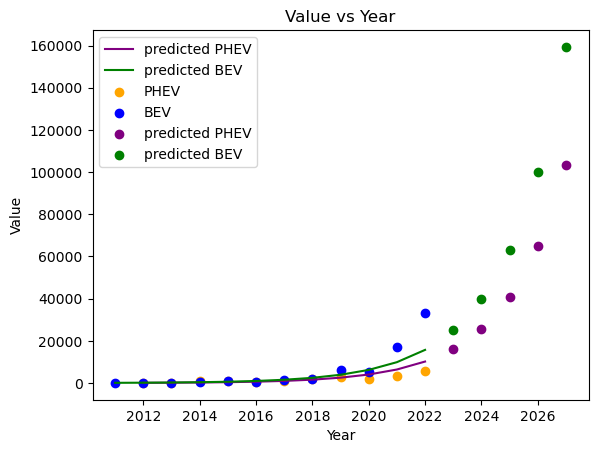

In [60]:

# Plotting new values for previous years
plt.plot(df_x_PHEV['year'], df_x_PHEV['value'],color='purple', label='predicted PHEV')
plt.plot(df_x_BEV['year'], df_x_BEV['value'],color='green', label='predicted BEV')

#plotting old values for previous years
plt.scatter(old_x_PHEV['year'],old_x_PHEV['value'],color='orange', label='PHEV')
plt.scatter(old_x_BEV['year'],old_x_BEV['value'],color='blue',label='BEV')

#plotting for future years and future values
plt.scatter(future_df_PHEV['year'], future_predicted_value_PHEV['value'],color='purple', label='predicted PHEV')
plt.scatter(future_df_BEV['year'], future_predicted_value_BEV['value'], color='green', label='predicted BEV')
# Set plot title and labels
plt.title('Value vs Year')
plt.xlabel('Year')
plt.ylabel('Value')

# Display the legend
plt.legend()

# Show the plot
plt.show()

In [65]:
# Filter the DataFrame by powertrain for finding value using model for each PHEV and BEV
df_x_PHEV_lasso = x[x['powertrain'] == 0]
df_x_BEV_lasso = x[x['powertrain'] == 1]

#calculating model values for known data using lasso
df_x_PHEV_lasso['log_value']=lasso_model.predict(df_x_PHEV_lasso)
df_x_PHEV_lasso['value']=df_x_PHEV_lasso['log_value'].apply(lambda x:np.exp(x))
print(df_x_PHEV_lasso)
df_x_BEV_lasso['log_value']=lasso_model.predict(df_x_BEV_lasso)
df_x_BEV_lasso['value']=df_x_BEV_lasso['log_value'].apply(lambda x:np.exp(x))
print(df_x_BEV_lasso)

    powertrain  year  log_value        value
2            0  2012   5.272745   194.950412
3            0  2013   5.640794   281.686403
6            0  2014   6.008844   407.012373
7            0  2015   6.376893   588.097508
10           0  2016   6.744942   849.749791
11           0  2017   7.112991  1227.814602
14           0  2018   7.481040  1774.085399
15           0  2019   7.849089  2563.399228
18           0  2020   8.217139  3703.889116
19           0  2021   8.585188  5351.797892
22           0  2022   8.953237  7732.882866
    powertrain  year  log_value        value
0            1  2011   4.904696   134.921894
1            1  2012   5.272745   194.950412
4            1  2013   5.640794   281.686403
5            1  2014   6.008844   407.012373
8            1  2015   6.376893   588.097508
9            1  2016   6.744942   849.749791
12           1  2017   7.112991  1227.814602
13           1  2018   7.481040  1774.085399
16           1  2019   7.849089  2563.399228
17        

C:\Users\risha\AppData\Local\Temp\ipykernel_40996\598757255.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x_PHEV_lasso['log_value']=lasso_model.predict(df_x_PHEV_lasso)
C:\Users\risha\AppData\Local\Temp\ipykernel_40996\598757255.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x_PHEV_lasso['value']=df_x_PHEV_lasso['log_value'].apply(lambda x:np.exp(x))
C:\Users\risha\AppData\Local\Temp\ipykernel_40996\598757255.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fr

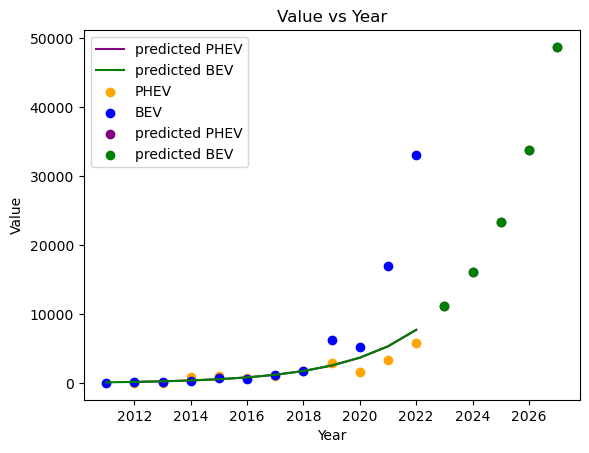

In [66]:
# Plotting new values for previous years
plt.plot(df_x_PHEV_lasso['year'], df_x_PHEV_lasso['value'],color='purple', label='predicted PHEV')
plt.plot(df_x_BEV_lasso['year'], df_x_BEV_lasso['value'],color='green', label='predicted BEV')

#plotting old values for previous years
plt.scatter(old_x_PHEV['year'],old_x_PHEV['value'],color='orange', label='PHEV')
plt.scatter(old_x_BEV['year'],old_x_BEV['value'],color='blue',label='BEV')

#plotting for future years and future values
plt.scatter(future_df_PHEV['year'], future_predicted_value_PHEV_lasso['values'],color='purple', label='predicted PHEV')
plt.scatter(future_df_BEV['year'], future_predicted_value_BEV_lasso['values'], color='green', label='predicted BEV')
# Set plot title and labels
plt.title('Value vs Year')
plt.xlabel('Year')
plt.ylabel('Value')

# Display the legend
plt.legend()

# Show the plot
plt.show()

Here we have made 2 models-                                         
linearRegression                                                     
lassoRegression                                                           
That can be used to predict the future sales value of PHEV and BEV for a single country 

we can see that the prediction is not optimum so we will try different models next.